# Analyse des Tendances du Marché Immobilier Français

## 📌 Analyse et Prédiction des Prix Fonciers en France

### 🏡 Introduction
L'immobilier est un secteur clé de l'économie française. Comprendre les tendances des prix fonciers permet non seulement d'éclairer les décisions des investisseurs et des acheteurs, mais aussi d'aider les collectivités locales et les urbanistes dans leurs choix stratégiques.

Dans ce projet, nous allons analyser et modéliser les prix fonciers en France en utilisant les données officielles des demandes de valeurs foncières (DVF) mises à disposition par le gouvernement français sur la plateforme [data.gouv.fr]("https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/"). Ces données regroupent les transactions immobilières enregistrées en France métropolitaine et en outre-mer.


### 🎯 Objectifs du projet

**Explorer et analyser les tendances du marché immobilier**
<ul>
  <li>Nettoyage et préparation des données.</li>
  <li>Analyse des distributions des prix fonciers.</li>
  <li>Étude des facteurs influençant la valeur foncière (superficie, localisation, type de bien, etc.).
</ul>
    


## Nettoyage et préparation des données.

## Chargement des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

## Chargement du jeu de données 

Récupérez les données publiques françaises disponibles sur le site [data.gouv](https://www.data.gouv.fr/fr/datasets/demandes-de-valeurs-foncieres-geolocalisees/), qui concernent les demandes de valeurs foncières géolocalisées.

In [2]:
data = pd.read_csv("full.csv", sep=",")

In [3]:
data.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,NaN,NaN,LE DELIVRE,B020,1230.0,...,NaN,NaN,NaN,P,prés,NaN,NaN,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,NaN,NaN,CHEVRY DESSOUS,B007,1170.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,NaN,NaN,PIN HAMEAU,B086,1290.0,...,NaN,NaN,NaN,S,sols,NaN,NaN,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,29.0,NaN,PL DU JURA,0500,1170.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.058695,46.332212


## Exploration des données

In [4]:
data.shape

(1566643, 40)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566643 entries, 0 to 1566642
Data columns (total 40 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   id_mutation                   1566643 non-null  object 
 1   date_mutation                 1566643 non-null  object 
 2   numero_disposition            1566643 non-null  int64  
 3   nature_mutation               1566643 non-null  object 
 4   valeur_fonciere               1549589 non-null  float64
 5   adresse_numero                946773 non-null   float64
 6   adresse_suffixe               67087 non-null    object 
 7   adresse_nom_voie              1558411 non-null  object 
 8   adresse_code_voie             1558442 non-null  object 
 9   code_postal                   1558158 non-null  float64
 10  code_commune                  1566643 non-null  object 
 11  nom_commune                   1566643 non-null  object 
 12  code_departement            

In [6]:
data.describe()

,numero_disposition,valeur_fonciere,adresse_numero,code_postal,ancien_code_commune,ancien_id_parcelle,lot1_surface_carrez,lot2_surface_carrez,lot3_surface_carrez,lot4_surface_carrez,lot5_numero,lot5_surface_carrez,nombre_lots,code_type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
count,1.566643e+06,1.549589e+06,946773.000000,1.558158e+06,21.0,0.0,135310.000000,45120.000000,4970.000000,1116.000000,3017.000000,320.000000,1.566643e+06,879876.000000,482832.000000,878849.000000,1.095430e+06,1.545401e+06,1.545401e+06
mean,1.151611e+00,5.851872e+05,662.467259,4.996029e+04,14666.0,NaN,60.292755,62.919226,70.770805,79.408799,87.190918,91.711625,4.175852e-01,2.289326,116.663939,1.695597,3.122533e+03,2.448369e+00,4.606385e+01
std,1.550544e+00,3.246600e+06,1951.490889,2.756937e+04,0.0,NaN,64.017448,35.458998,58.454641,60.485274,573.008003,88.386506,8.358091e-01,0.922287,874.660282,2.041418,1.497313e+04,6.369826e+00,6.198123e+00
min,1.000000e+00,1.500000e-01,1.000000,1.000000e+03,14666.0,NaN,0.790000,0.600000,0.650000,0.860000,2.000000,1.000000,0.000000e+00,1.000000,1.000000,0.000000,1.000000e+00,-6.313720e+01,-2.138483e+01
25%,1.000000e+00,5.000000e+04,8.000000,2.768000e+04,14666.0,NaN,35.000000,43.250000,41.800000,40.760000,7.000000,42.470000,0.000000e+00,1.000000,48.000000,0.000000,2.590000e+02,3.628740e-01,4.466472e+01
50%,1.000000e+00,1.485000e+05,24.000000,4.930000e+04,14666.0,NaN,54.210000,61.470000,62.120000,69.890000,20.000000,73.000000,0.000000e+00,3.000000,74.000000,0.000000,6.700000e+02,2.373625e+00,4.672685e+01
75%,1.000000e+00,2.860000e+05,92.000000,7.500800e+04,14666.0,NaN,73.250000,76.800000,84.607500,103.700000,58.000000,111.200000,1.000000e+00,3.000000,103.000000,3.000000,2.086000e+03,4.546703e+00,4.867011e+01
max,1.610000e+02,2.550000e+08,9999.000000,9.749000e+04,14666.0,NaN,4774.550000,2569.000000,1800.000000,682.460000,20046.000000,746.000000,2.360000e+02,4.000000,265000.000000,70.000000,7.700000e+06,5.582527e+01,5.108207e+01


## 🔍 Gestion des valeurs manquantes

In [7]:
percentage_des_valeur_null = data.isnull().mean()*100
percentage_des_valeur_null

id_mutation                       0.000000
date_mutation                     0.000000
numero_disposition                0.000000
nature_mutation                   0.000000
valeur_fonciere                   1.088570
adresse_numero                   39.566768
adresse_suffixe                  95.717786
adresse_nom_voie                  0.525455
adresse_code_voie                 0.523476
code_postal                       0.541604
code_commune                      0.000000
nom_commune                       0.000000
code_departement                  0.000000
ancien_code_commune              99.998660
ancien_nom_commune               99.998660
id_parcelle                       0.000000
ancien_id_parcelle              100.000000
numero_volume                    99.768614
lot1_numero                      70.368169
lot1_surface_carrez              91.363061
lot2_numero                      90.583943
lot2_surface_carrez              97.119956
lot3_numero                      98.399955
lot3_surfac

#### Colonnes avec peu ou pas de valeurs manquantes (0%)

- id_mutation, date_mutation, numero_disposition, valeur_fonciere, code_commune, nom_commune, code_departement, id_parcelle, nombre_lots
- Ces colonnes sont bien remplies et peuvent être utilisées directement dans l'analyse.

#### Colonnes avec un fort taux de valeurs manquantes (>90%)

- adresse_suffixe (95%), ancien_code_commune (99%), ancien_nom_commune (99%), ancien_id_parcelle (100%), lot_1_surface_carrez (91%), lot_2_surface_carrez (97%)

- Ces colonnes contiennent beaucoup de valeurs manquantes et pourraient être supprimées ou imputées si elles sont essentielles.

#### Colonnes avec un taux de valeurs manquantes modéré (30-70%)

- surface_reelle_bati (69%), code_type_local (43%), nombre_pieces_principales (43%)
Ces variables sont importantes pour l'analyse et la modélisation. Il faudra décider de les imputer (médiane/moyenne) ou de supprimer les lignes concernées.

L'analyse exploratoire a révélé qu'un certain nombre de colonnes contiennent un pourcentage élevé de valeurs manquantes. Afin d'améliorer la qualité des données et d'éviter des biais dans l'analyse et la modélisation, nous avons pris la décision de supprimer toutes les colonnes ayant plus de 40 % de valeurs manquantes.

In [8]:
list_des_collone_a_supprimer =  percentage_des_valeur_null[percentage_des_valeur_null > 40].index.tolist()
list_des_collone_a_supprimer

['adresse_suffixe',
 'ancien_code_commune',
 'ancien_nom_commune',
 'ancien_id_parcelle',
 'numero_volume',
 'lot1_numero',
 'lot1_surface_carrez',
 'lot2_numero',
 'lot2_surface_carrez',
 'lot3_numero',
 'lot3_surface_carrez',
 'lot4_numero',
 'lot4_surface_carrez',
 'lot5_numero',
 'lot5_surface_carrez',
 'code_type_local',
 'type_local',
 'surface_reelle_bati',
 'nombre_pieces_principales',
 'code_nature_culture_speciale',
 'nature_culture_speciale']

In [9]:
data = data.drop(columns=list_des_collone_a_supprimer)
data.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,adresse_code_voie,code_postal,code_commune,nom_commune,code_departement,id_parcelle,nombre_lots,code_nature_culture,nature_culture,surface_terrain,longitude,latitude
0,2024-1,2024-01-02,1,Vente,346.5,NaN,LE DELIVRE,B020,1230.0,1076,Chaley,1,010760000B0514,0,P,prés,99.0,5.530952,45.952439
1,2024-2,2024-01-03,2,Vente,10000.0,NaN,CHEVRY DESSOUS,B007,1170.0,1103,Chevry,1,011030000B1782,0,S,sols,115.0,6.043339,46.282256
2,2024-3,2024-01-08,1,Vente,249000.0,NaN,PIN HAMEAU,B086,1290.0,1203,Laiz,1,012030000C1065,0,S,sols,497.0,4.911143,46.247235
3,2024-4,2024-01-03,1,Vente,329500.0,29.0,PL DU JURA,0500,1170.0,1173,Gex,1,01173000AI0551,2,NaN,NaN,NaN,6.058695,46.332212
4,2024-4,2024-01-03,1,Vente,329500.0,29.0,PL DU JURA,0500,1170.0,1173,Gex,1,01173000AI0551,2,NaN,NaN,NaN,6.058695,46.332212


In [10]:
data = data.dropna(subset=["valeur_fonciere"])

In [11]:
data.shape

(1549589, 19)

## Supprimer les doublons

In [12]:
data = data.drop_duplicates()

In [13]:
data.shape

(1122227, 19)

✅ Wow ! On passe de **1 549 589** lignes à **1 122 227** après avoir supprimé toutes les données en double.

## Corriger les formats de données

In [14]:
data["date_mutation"] = pd.to_datetime(data["date_mutation"], errors="coerce")

## Analyse des distributions des prix fonciers.

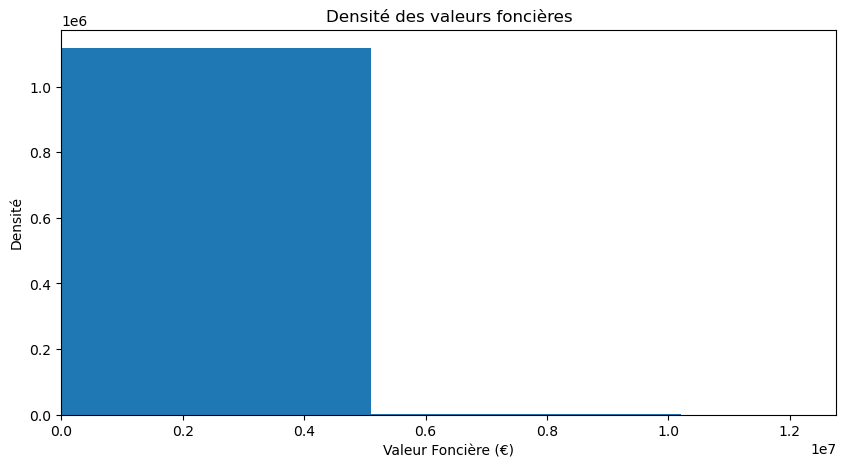

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(data["valeur_fonciere"], bins=50)
plt.xlabel("Valeur Foncière (€)")
plt.ylabel("Densité")
plt.title("Densité des valeurs foncières")
plt.xlim(0, data["valeur_fonciere"].quantile(0.999))  # Exclure le top 1% des valeurs extrêmes
plt.show()

L'histogramme montre un problème classique en analyse des valeurs foncières : les données sont fortement asymétriques avec une grande concentration de valeurs faibles et quelques valeurs extrêmes.<br><br>
### Solution : Appliquer une transformation logarithmique

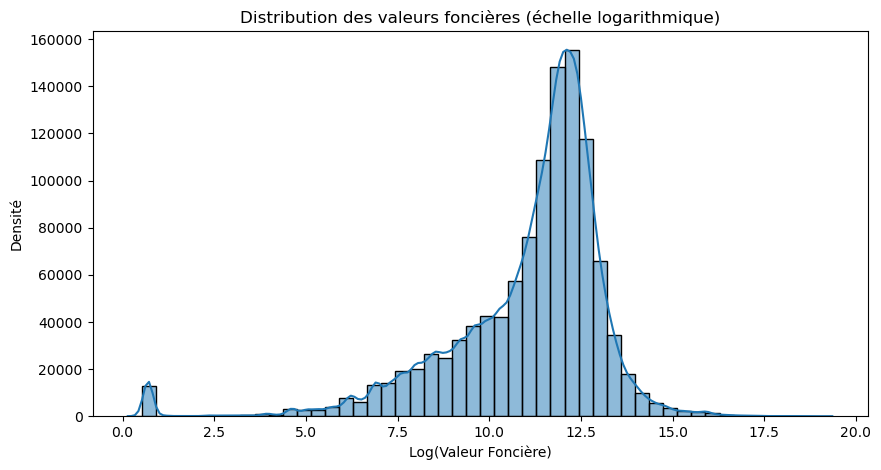

In [16]:
data["valeur_fonciere_log"] = np.log1p(data["valeur_fonciere"])

plt.figure(figsize=(10, 5))
sns.histplot(data["valeur_fonciere_log"], bins=50, kde=True)
plt.xlabel("Log(Valeur Foncière)")
plt.ylabel("Densité")
plt.title("Distribution des valeurs foncières (échelle logarithmique)")
plt.show()

In [17]:
data["prix_m2"] = data["valeur_fonciere"] / data["surface_terrain"]

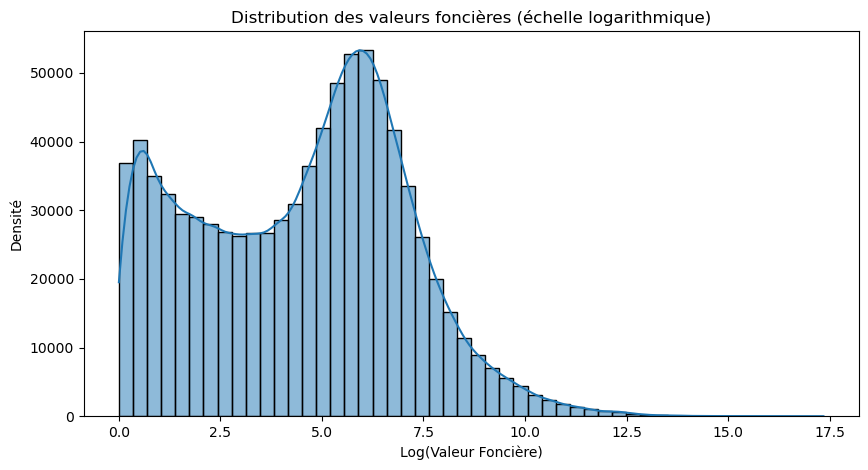

In [18]:
data["prix_m2_log"] = np.log1p(data["prix_m2"])

plt.figure(figsize=(10, 5))
sns.histplot(data["prix_m2_log"], bins=50, kde=True)
plt.xlabel("Log(Valeur Foncière)")
plt.ylabel("Densité")
plt.title("Distribution des valeurs foncières (échelle logarithmique)")
plt.show()

### Interprétation de la distribution des valeurs foncières par metre carre (échelle logarithmique)
L'histogramme représente la distribution des valeurs foncières transformées en échelle logarithmique (log1p(prix_m2)). Voici quelques points d'analyse : <br>

1️⃣ **Distribution asymétrique avec deux pics**<br>
On observe deux pics distincts, ce qui signifie qu’il existe deux groupes dominants dans les données.<br>
Un premier groupe autour de 0-2, qui pourrait correspondre aux biens très peu chers (ou erreurs dans les données).<br>
Un second groupe autour de 5-7, qui représenterait la majorité des valeurs foncières.<br>
2️⃣ **Queue allongée à droite**<br>
Certaines valeurs vont au-delà de 12-15, ce qui signifie qu’il y a encore quelques propriétés très chères, même après la transformation logarithmique.

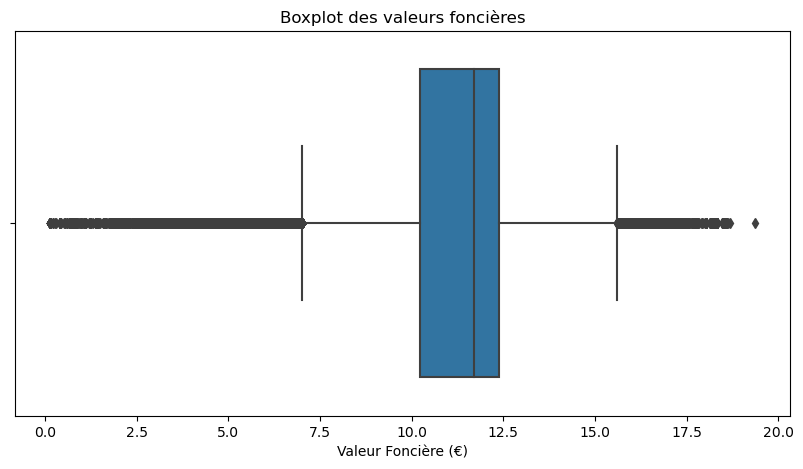

In [19]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=data["valeur_fonciere_log"])
plt.xlabel("Valeur Foncière (€)")
plt.title("Boxplot des valeurs foncières")
plt.show()

### Analyse du Boxplot des valeurs foncières
📌 **1. Présence de nombreuses valeurs extrêmes (outliers)**<br>
Les points en dehors des moustaches du boxplot représentent des valeurs extrêmes.<br>
Il y en a beaucoup, ce qui signifie qu’il existe des biens avec des valeurs foncières très élevées ou très faibles par rapport à la majorité.<br><br>
📌 **2. Médiane et dispersion des données**<br>
La boîte centrale représente l’intervalle interquartile (IQR), qui contient 50% des données.<br>
La médiane est proche de 10-12 en échelle logarithmique, ce qui signifie que la majorité des prix fonciers se situent dans cette plage après transformation (log(valeur foncière)).<br>
Les moustaches (lignes qui prolongent la boîte) montrent l’étendue des valeurs non considérées comme extrêmes.<br><br>
📌 **3. Pourquoi autant d'outliers ?**<br>
La distribution initiale était probablement très asymétrique, avec beaucoup de valeurs foncières très élevées.
Même après la transformation logarithmique, on observe encore une forte dispersion.
Il peut s'agir : 
- De biens immobiliers de luxe.<br>
- D'erreurs ou d’anomalies dans les données.
- De différences géographiques majeures (ex : Paris vs zones rurales).